In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()

In [125]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [479]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')
All = concat_df(Train,Test)

In [480]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,10

In [481]:
All.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


<AxesSubplot:>

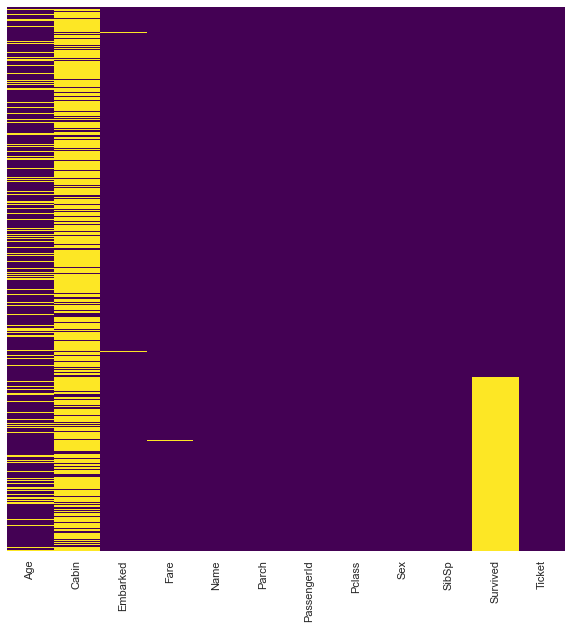

In [482]:
sns.heatmap(data=All.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [483]:
All.drop('Cabin',inplace=True,axis=1)

<AxesSubplot:>

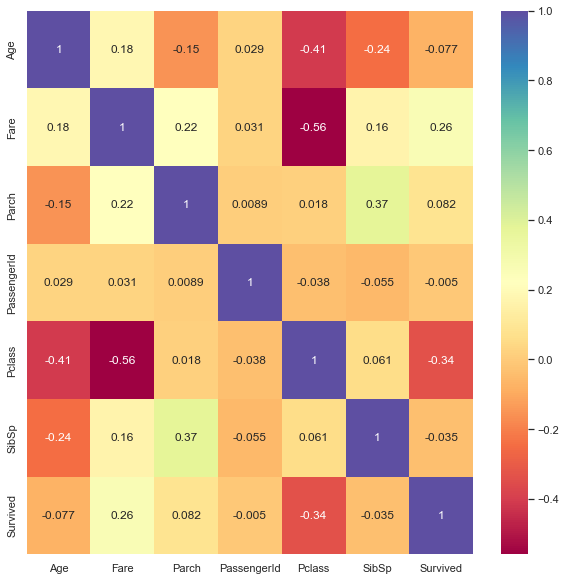

In [484]:
sns.heatmap(All.corr(),cmap="Spectral",annot=True)

In [485]:
Sclass = {1:'1st Class',2:'2nd Class',3:'3rd Class'}
All['Pclass'] = All['Pclass'].map(Sclass)
All.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3rd Class,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3rd Class,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3rd Class,male,0,0.0,373450


In [486]:
Locations = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'}
All['Embarked'] = All['Embarked'].map(Locations)

In [487]:
All.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,Southampton,7.2500,"Braund, Mr. Owen Harris",0,1,3rd Class,male,1,0.0,A/5 21171
1,38.0,Cherbourg,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,female,1,1.0,PC 17599
2,26.0,Southampton,7.9250,"Heikkinen, Miss. Laina",0,3,3rd Class,female,0,1.0,STON/O2. 3101282
3,35.0,Southampton,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,female,1,1.0,113803
4,35.0,Southampton,8.0500,"Allen, Mr. William Henry",0,5,3rd Class,male,0,0.0,373450


<AxesSubplot:xlabel='Embarked', ylabel='count'>

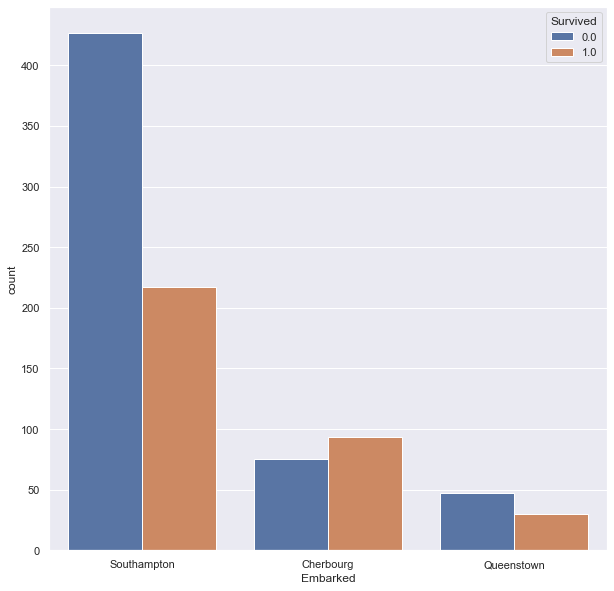

In [488]:
sns.countplot(x='Embarked',hue='Survived',data=All)

<AxesSubplot:xlabel='Sex', ylabel='count'>

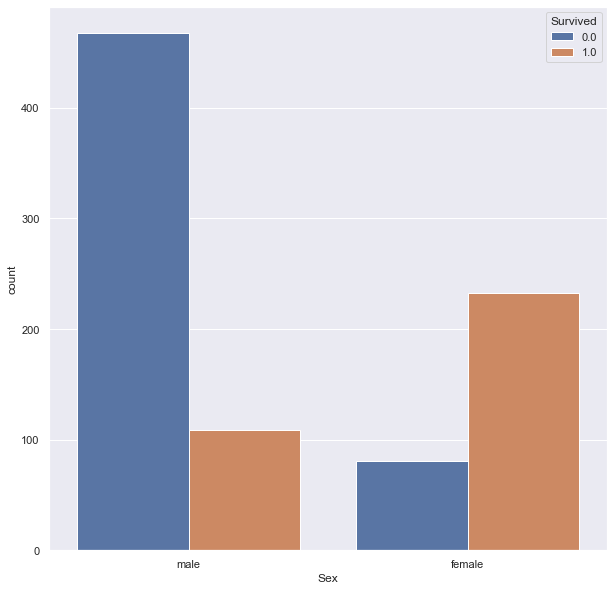

In [489]:
sns.countplot(x='Sex',hue='Survived',data=All)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

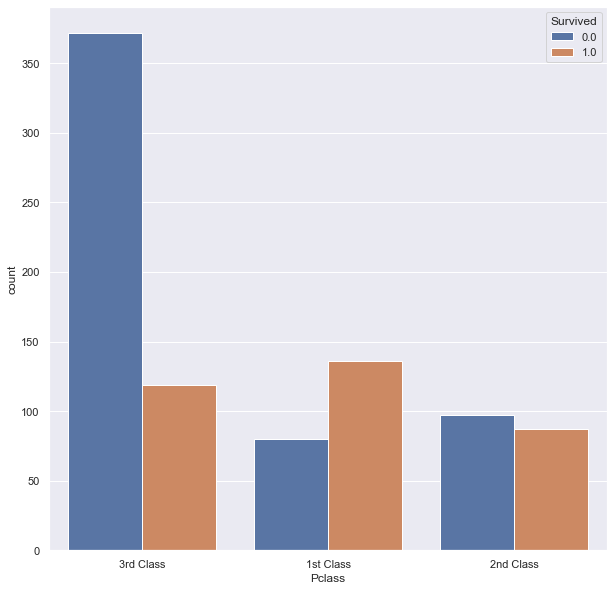

In [490]:
sns.countplot(x='Pclass',hue='Survived',data=All)

In [491]:
def Fill(cool):
    Age = cool[0]
    Pclass = cool[1]
    Sex = cool[2]

    if pd.isnull(Age):
        if (Pclass == '1st Class') & (Sex == 'male'):
            return 41
        elif (Pclass == '2nd Class') & (Sex == 'male'):
            return 30
        elif (Pclass == '3rd Class') & (Sex == 'male'):
            return 25
        elif (Pclass == '1st Class') & (Sex == 'female'):
            return 37
        elif (Pclass == '2nd Class') & (Sex == 'female'):
            return 27
        elif (Pclass == '3rd Class') & (Sex == 'female'):
            return 22
    else:
        return Age 

In [492]:
All['Age'] = All[['Age','Pclass','Sex']].apply(Fill,axis=1)

In [493]:
All.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,Southampton,7.2500,"Braund, Mr. Owen Harris",0,1,3rd Class,male,1,0.0,A/5 21171
1,38.0,Cherbourg,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,female,1,1.0,PC 17599
2,26.0,Southampton,7.9250,"Heikkinen, Miss. Laina",0,3,3rd Class,female,0,1.0,STON/O2. 3101282
3,35.0,Southampton,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,female,1,1.0,113803
4,35.0,Southampton,8.0500,"Allen, Mr. William Henry",0,5,3rd Class,male,0,0.0,373450


In [494]:
All.at[1043, 'Fare'] = 12.1207

In [495]:
All.at[(61,829),'Embarked'] = 'Cherbourg'

In [496]:
All.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,Southampton,7.2500,"Braund, Mr. Owen Harris",0,1,3rd Class,male,1,0.0,A/5 21171
1,38.0,Cherbourg,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,female,1,1.0,PC 17599
2,26.0,Southampton,7.9250,"Heikkinen, Miss. Laina",0,3,3rd Class,female,0,1.0,STON/O2. 3101282
3,35.0,Southampton,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,female,1,1.0,113803
4,35.0,Southampton,8.0500,"Allen, Mr. William Henry",0,5,3rd Class,male,0,0.0,373450


<AxesSubplot:>

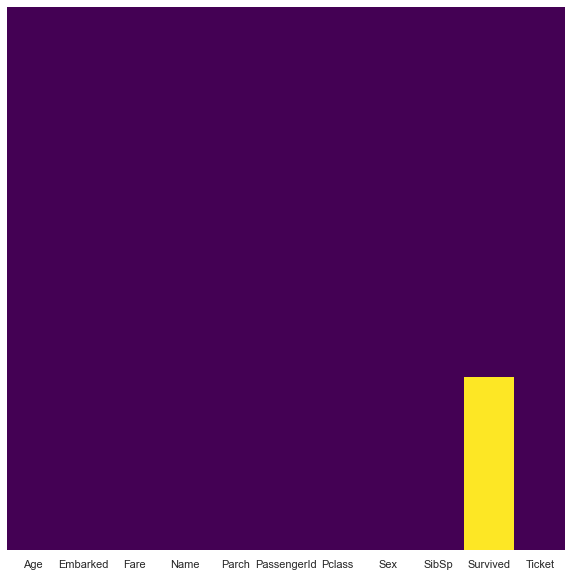

In [497]:
sns.heatmap(data=All.isnull(),yticklabels=False,cbar=False,cmap='viridis')

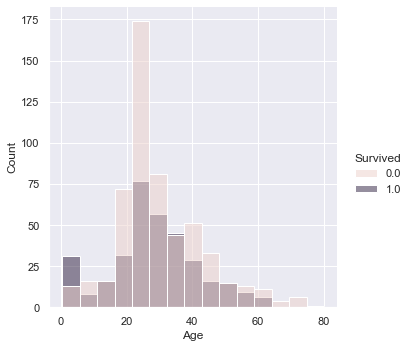

In [498]:
sns.displot(x='Age',hue='Survived',data=All,bins=15)

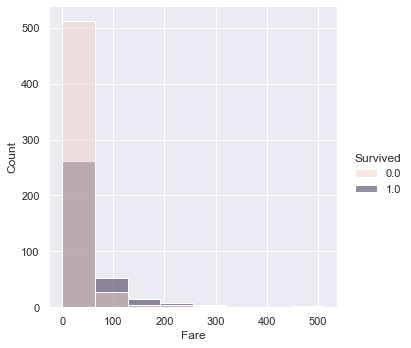

In [499]:
sns.displot(x='Fare',hue='Survived',data=All,bins=8)

In [500]:
All['Fsize'] = All['Parch'] + All['SibSp'] + 1

In [501]:
All.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fsize
0,22.0,Southampton,7.2500,"Braund, Mr. Owen Harris",0,1,3rd Class,male,1,0.0,A/5 21171,2
1,38.0,Cherbourg,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,female,1,1.0,PC 17599,2
2,26.0,Southampton,7.9250,"Heikkinen, Miss. Laina",0,3,3rd Class,female,0,1.0,STON/O2. 3101282,1
3,35.0,Southampton,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,female,1,1.0,113803,2
4,35.0,Southampton,8.0500,"Allen, Mr. William Henry",0,5,3rd Class,male,0,0.0,373450,1


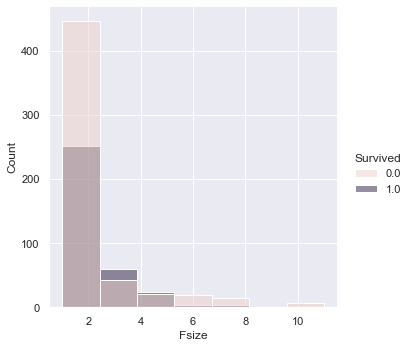

In [502]:
sns.displot(x='Fsize',hue='Survived',data=All,bins=7)

In [503]:
#Title = pd.get_dummies(All['Title'],drop_first=False)

In [504]:
Pclass = pd.get_dummies(All['Pclass'],drop_first=False)
Sex = pd.get_dummies(All['Sex'],drop_first=False)
Embark = pd.get_dummies(All['Embarked'],drop_first=False)

In [505]:
All = pd.concat([All,Sex,Embark,Pclass],axis=1)

In [506]:
All.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fsize,female,male,Cherbourg,Queenstown,Southampton,1st Class,2nd Class,3rd Class
0,22.0,Southampton,7.2500,"Braund, Mr. Owen Harris",0,1,3rd Class,male,1,0.0,A/5 21171,2,0,1,0,0,1,0,0,1
1,38.0,Cherbourg,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,female,1,1.0,PC 17599,2,1,0,1,0,0,1,0,0
2,26.0,Southampton,7.9250,"Heikkinen, Miss. Laina",0,3,3rd Class,female,0,1.0,STON/O2. 3101282,1,1,0,0,0,1,0,0,1
3,35.0,Southampton,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,female,1,1.0,113803,2,1,0,0,0,1,1,0,0
4,35.0,Southampton,8.0500,"Allen, Mr. William Henry",0,5,3rd Class,male,0,0.0,373450,1,0,1,0,0,1,0,0,1


<AxesSubplot:>

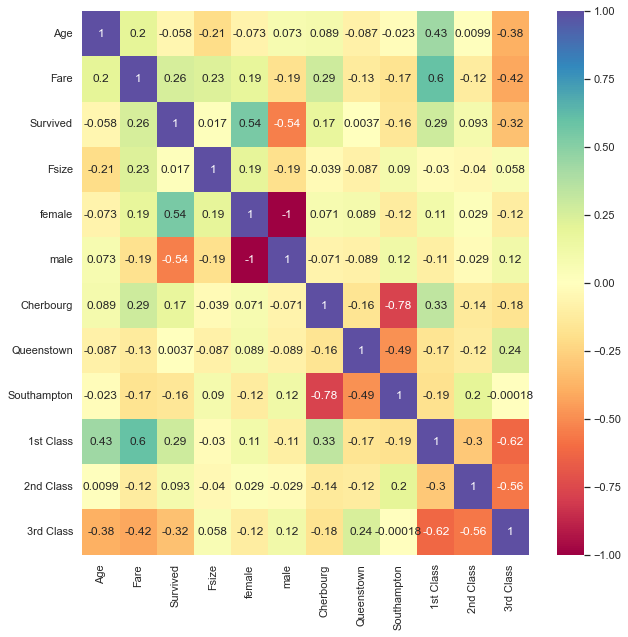

In [507]:
sns.heatmap(All.drop(['Pclass','Sex','Embarked','SibSp','Parch','PassengerId'],axis=1).corr(),cmap="Spectral",annot=True)

In [508]:
dfs = divide_df(All)
Test = dfs[1]
Train = dfs[0]

In [509]:
labels = Test['PassengerId']

In [510]:
All = concat_df(Train,Test)

In [511]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Embarked,Fare,Fsize,Name,Parch,PassengerId,Pclass,Queenstown,Sex,SibSp,Southampton,Survived,Ticket,female,male
0,0,0,1,22.0,0,Southampton,7.2500,2,"Braund, Mr. Owen Harris",0,1,3rd Class,0,male,1,1,0.0,A/5 21171,0,1
1,1,0,0,38.0,1,Cherbourg,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1st Class,0,female,1,0,1.0,PC 17599,1,0
2,0,0,1,26.0,0,Southampton,7.9250,1,"Heikkinen, Miss. Laina",0,3,3rd Class,0,female,0,1,1.0,STON/O2. 3101282,1,0
3,1,0,0,35.0,0,Southampton,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1st Class,0,female,1,1,1.0,113803,1,0
4,0,0,1,35.0,0,Southampton,8.0500,1,"Allen, Mr. William Henry",0,5,3rd Class,0,male,0,1,0.0,373450,0,1


In [512]:
All.drop(['Pclass','Sex','Embarked','SibSp','Parch','PassengerId'],axis=1,inplace=True)

In [513]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Name,Queenstown,Southampton,Survived,Ticket,female,male
0,0,0,1,22.0,0,7.2500,2,"Braund, Mr. Owen Harris",0,1,0.0,A/5 21171,0,1
1,1,0,0,38.0,1,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1.0,PC 17599,1,0
2,0,0,1,26.0,0,7.9250,1,"Heikkinen, Miss. Laina",0,1,1.0,STON/O2. 3101282,1,0
3,1,0,0,35.0,0,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1.0,113803,1,0
4,0,0,1,35.0,0,8.0500,1,"Allen, Mr. William Henry",0,1,0.0,373450,0,1


In [514]:
All['Title'] = All['Name'].str.split('.').str.get(0)
All['Title'] = All['Title'].str.split(',').str.get(1)
All['Title'] = All['Title'].str.strip()

french_titles = ['Don', 'Dona', 'Mme', 'Ms', 'Mra','Mlle']
english_titles = ['Mr', 'Mrs','Mrs','Mrs','Mrs','Miss']
for i in range(len(french_titles)):
    for j in range(len(english_titles)):
        if i == j:
            All['Title'] = All['Title'].str.replace(french_titles[i],english_titles[j])

In [515]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Name,Queenstown,Southampton,Survived,Ticket,female,male,Title
0,0,0,1,22.0,0,7.2500,2,"Braund, Mr. Owen Harris",0,1,0.0,A/5 21171,0,1,Mr
1,1,0,0,38.0,1,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1.0,PC 17599,1,0,Mrs
2,0,0,1,26.0,0,7.9250,1,"Heikkinen, Miss. Laina",0,1,1.0,STON/O2. 3101282,1,0,Miss
3,1,0,0,35.0,0,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1.0,113803,1,0,Mrs
4,0,0,1,35.0,0,8.0500,1,"Allen, Mr. William Henry",0,1,0.0,373450,0,1,Mr


In [516]:
All.groupby('Title').count()['Survived']

Title
Capt              1
Col               2
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            184
Mr              518
Mrs             127
Rev               6
Sir               1
the Countess      1
Name: Survived, dtype: int64

In [517]:
Unique = ['Capt','Jonkheer','Lady','Sir','the Countess']
All['Title'] = All['Title'].apply(lambda title: 'Unique' if title in Unique else title)

In [518]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Name,Queenstown,Southampton,Survived,Ticket,female,male,Title
0,0,0,1,22.0,0,7.2500,2,"Braund, Mr. Owen Harris",0,1,0.0,A/5 21171,0,1,Mr
1,1,0,0,38.0,1,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1.0,PC 17599,1,0,Mrs
2,0,0,1,26.0,0,7.9250,1,"Heikkinen, Miss. Laina",0,1,1.0,STON/O2. 3101282,1,0,Miss
3,1,0,0,35.0,0,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1.0,113803,1,0,Mrs
4,0,0,1,35.0,0,8.0500,1,"Allen, Mr. William Henry",0,1,0.0,373450,0,1,Mr


In [519]:
Titles = pd.get_dummies(All['Title'],drop_first=False)
All = pd.concat([All,Titles],axis=1)

In [520]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Name,Queenstown,Southampton,...,Title,Col,Dr,Major,Master,Miss,Mr,Mrs,Rev,Unique
0,0,0,1,22.0,0,7.2500,2,"Braund, Mr. Owen Harris",0,1,...,Mr,0,0,0,0,0,1,0,0,0
1,1,0,0,38.0,1,71.2833,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,...,Mrs,0,0,0,0,0,0,1,0,0
2,0,0,1,26.0,0,7.9250,1,"Heikkinen, Miss. Laina",0,1,...,Miss,0,0,0,0,1,0,0,0,0
3,1,0,0,35.0,0,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,...,Mrs,0,0,0,0,0,0,1,0,0
4,0,0,1,35.0,0,8.0500,1,"Allen, Mr. William Henry",0,1,...,Mr,0,0,0,0,0,1,0,0,0


In [521]:
All.drop(['Title','Name'],axis=1,inplace=True)

In [522]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Queenstown,Southampton,Survived,...,male,Col,Dr,Major,Master,Miss,Mr,Mrs,Rev,Unique
0,0,0,1,22.0,0,7.2500,2,0,1,0.0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,38.0,1,71.2833,2,0,0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,26.0,0,7.9250,1,0,1,1.0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,35.0,0,53.1000,2,0,1,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,35.0,0,8.0500,1,0,1,0.0,...,1,0,0,0,0,0,1,0,0,0


In [523]:
All['AgeBand'] = pd.cut(All['Age'], 14)
All[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 5.872]",0.704545
1,"(5.872, 11.574]",0.333333
2,"(11.574, 17.276]",0.488889
3,"(17.276, 22.979]",0.387500
4,"(22.979, 28.681]",0.266376
5,"(28.681, 34.383]",0.406504
6,"(34.383, 40.085]",0.505263
7,"(40.085, 45.787]",0.314286
8,"(45.787, 51.489]",0.409091
9,"(51.489, 57.191]",0.416667


In [524]:
All['AgeBand'] = All['AgeBand'].apply(lambda x: f'A {x}')

In [525]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Queenstown,Southampton,Survived,...,Col,Dr,Major,Master,Miss,Mr,Mrs,Rev,Unique,AgeBand
0,0,0,1,22.0,0,7.2500,2,0,1,0.0,...,0,0,0,0,0,1,0,0,0,"A (17.276, 22.979]"
1,1,0,0,38.0,1,71.2833,2,0,0,1.0,...,0,0,0,0,0,0,1,0,0,"A (34.383, 40.085]"
2,0,0,1,26.0,0,7.9250,1,0,1,1.0,...,0,0,0,0,1,0,0,0,0,"A (22.979, 28.681]"
3,1,0,0,35.0,0,53.1000,2,0,1,1.0,...,0,0,0,0,0,0,1,0,0,"A (34.383, 40.085]"
4,0,0,1,35.0,0,8.0500,1,0,1,0.0,...,0,0,0,0,0,1,0,0,0,"A (34.383, 40.085]"


In [526]:
All['FareBand'] = pd.cut(All['Fare'],6)
All[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 85.388]",0.352727
1,"(85.388, 170.776]",0.804348
2,"(170.776, 256.165]",0.636364
3,"(256.165, 341.553]",0.666667
4,"(341.553, 426.941]",NaN
5,"(426.941, 512.329]",1.000000


In [527]:
All['FareBand'] = All['FareBand'].apply(lambda x: f'F {x}')

In [528]:
All.head()

,1st Class,2nd Class,3rd Class,Age,Cherbourg,Fare,Fsize,Queenstown,Southampton,Survived,...,Dr,Major,Master,Miss,Mr,Mrs,Rev,Unique,AgeBand,FareBand
0,0,0,1,22.0,0,7.2500,2,0,1,0.0,...,0,0,0,0,1,0,0,0,"A (17.276, 22.979]","F (-0.512, 85.388]"
1,1,0,0,38.0,1,71.2833,2,0,0,1.0,...,0,0,0,0,0,1,0,0,"A (34.383, 40.085]","F (-0.512, 85.388]"
2,0,0,1,26.0,0,7.9250,1,0,1,1.0,...,0,0,0,1,0,0,0,0,"A (22.979, 28.681]","F (-0.512, 85.388]"
3,1,0,0,35.0,0,53.1000,2,0,1,1.0,...,0,0,0,0,0,1,0,0,"A (34.383, 40.085]","F (-0.512, 85.388]"
4,0,0,1,35.0,0,8.0500,1,0,1,0.0,...,0,0,0,0,1,0,0,0,"A (34.383, 40.085]","F (-0.512, 85.388]"


In [529]:
All['Fsize'] = All['Fsize'].apply(lambda x: f'S {x}')

In [530]:
Fsize = pd.get_dummies(All['Fsize'],drop_first=False)
FareBand = pd.get_dummies(All['FareBand'],drop_first=False)
AgeBand = pd.get_dummies(All['AgeBand'],drop_first=False)
All = pd.concat([All,Fsize,FareBand,AgeBand],axis=1)
All = All.drop(['Fsize','Fare','Age','FareBand','Fsize','AgeBand'],axis=1)

In [531]:
All.head()

,1st Class,2nd Class,3rd Class,Cherbourg,Queenstown,Southampton,Survived,Ticket,female,male,...,"A (22.979, 28.681]","A (28.681, 34.383]","A (34.383, 40.085]","A (40.085, 45.787]","A (45.787, 51.489]","A (51.489, 57.191]","A (57.191, 62.894]","A (62.894, 68.596]","A (68.596, 74.298]","A (74.298, 80.0]"
0,0,0,1,0,0,1,0.0,A/5 21171,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1.0,PC 17599,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1.0,STON/O2. 3101282,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1.0,113803,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0.0,373450,0,1,...,0,0,1,0,0,0,0,0,0,0


In [532]:
All = All.drop(['Ticket'],axis=1)

In [533]:
All.head()

,1st Class,2nd Class,3rd Class,Cherbourg,Queenstown,Southampton,Survived,female,male,Col,...,"A (22.979, 28.681]","A (28.681, 34.383]","A (34.383, 40.085]","A (40.085, 45.787]","A (45.787, 51.489]","A (51.489, 57.191]","A (57.191, 62.894]","A (62.894, 68.596]","A (68.596, 74.298]","A (74.298, 80.0]"
0,0,0,1,0,0,1,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [545]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [535]:
dfs = divide_df(All)
Test = dfs[1]
Train = dfs[0]

In [536]:
Train.drop('Survived',axis=1)

,1st Class,2nd Class,3rd Class,Cherbourg,Queenstown,Southampton,female,male,Col,Dr,...,"A (22.979, 28.681]","A (28.681, 34.383]","A (34.383, 40.085]","A (40.085, 45.787]","A (45.787, 51.489]","A (51.489, 57.191]","A (57.191, 62.894]","A (62.894, 68.596]","A (68.596, 74.298]","A (74.298, 80.0]"
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
887,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [537]:
Train['Survived']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [538]:
Test

,1st Class,2nd Class,3rd Class,Cherbourg,Queenstown,Southampton,female,male,Col,Dr,...,"A (22.979, 28.681]","A (28.681, 34.383]","A (34.383, 40.085]","A (40.085, 45.787]","A (45.787, 51.489]","A (51.489, 57.191]","A (57.191, 62.894]","A (62.894, 68.596]","A (68.596, 74.298]","A (74.298, 80.0]"
891,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
892,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
893,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
894,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
895,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1305,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1306,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1307,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [539]:
X_train = Train.drop('Survived',axis=1)
Y_train = Train['Survived'].values
X_test = Test

In [540]:
X_train

,1st Class,2nd Class,3rd Class,Cherbourg,Queenstown,Southampton,female,male,Col,Dr,...,"A (22.979, 28.681]","A (28.681, 34.383]","A (34.383, 40.085]","A (40.085, 45.787]","A (45.787, 51.489]","A (51.489, 57.191]","A (57.191, 62.894]","A (62.894, 68.596]","A (68.596, 74.298]","A (74.298, 80.0]"
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
887,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [541]:
Y_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [542]:
X_test

,1st Class,2nd Class,3rd Class,Cherbourg,Queenstown,Southampton,female,male,Col,Dr,...,"A (22.979, 28.681]","A (28.681, 34.383]","A (34.383, 40.085]","A (40.085, 45.787]","A (45.787, 51.489]","A (51.489, 57.191]","A (57.191, 62.894]","A (62.894, 68.596]","A (68.596, 74.298]","A (74.298, 80.0]"
891,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
892,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
893,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
894,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
895,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1305,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1306,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1307,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [547]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.78

In [559]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           n_jobs=-1,
                                           verbose=1)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s


82.6

In [560]:
Y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [553]:
labels = labels.to_frame()

In [561]:
Fresults_1 = labels.assign(Survived=Y_pred)
Fresults_1.to_csv('titanic_submission_f1.csv',index=False)
Fresults_1.head(20)

,PassengerId,Survived
891,892,0.0
892,893,1.0
893,894,0.0
894,895,0.0
895,896,1.0
896,897,0.0
897,898,1.0
898,899,0.0
899,900,1.0
900,901,0.0


In [562]:
Fresults_1['Survived'] = Fresults_1['Survived'].astype('int')

In [563]:
Fresults_1.to_csv('titanic_submission_f1.csv',index=False)
Fresults_1.head(20)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0
